In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [42]:
#Directorio que contiene las imágenes de hojas de mango
data_folder = "/content/drive/MyDrive/Visión por computadora/Tareas/Actividad_Clase_8/mango_leaf_disease"
images, labels = load_images_from_folder(data_folder)

In [19]:
#Convertir las listas a arrays de numpy
data = np.array(data)
labels = np.array(labels)

In [44]:
def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    images.append(img)
                    labels.append(subfolder)
    return np.array(images), np.array(labels)

In [45]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
        feature, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
        hog_features.append(feature)
    return np.array(hog_features)

hog_features = extract_hog_features(images)

In [47]:
#Codificar etiquetas
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [48]:
#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(hog_features, encoded_labels, test_size=0.2, random_state=42)

In [49]:
#Crear el clasificador One-vs-All con regresión logística
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [50]:
#Predicciones
y_pred = model.predict(X_test)

In [51]:
#Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.79125
Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.70      0.67      0.69        86
Bacterial Canker       0.87      0.90      0.89       123
  Cutting Weevil       0.96      0.98      0.97       112
        Die Back       0.92      0.92      0.92       101
      Gall Midge       0.69      0.69      0.69       104
         Healthy       0.76      0.80      0.78        90
  Powdery Mildew       0.75      0.70      0.72        93
     Sooty Mould       0.60      0.57      0.58        91

        accuracy                           0.79       800
       macro avg       0.78      0.78      0.78       800
    weighted avg       0.79      0.79      0.79       800



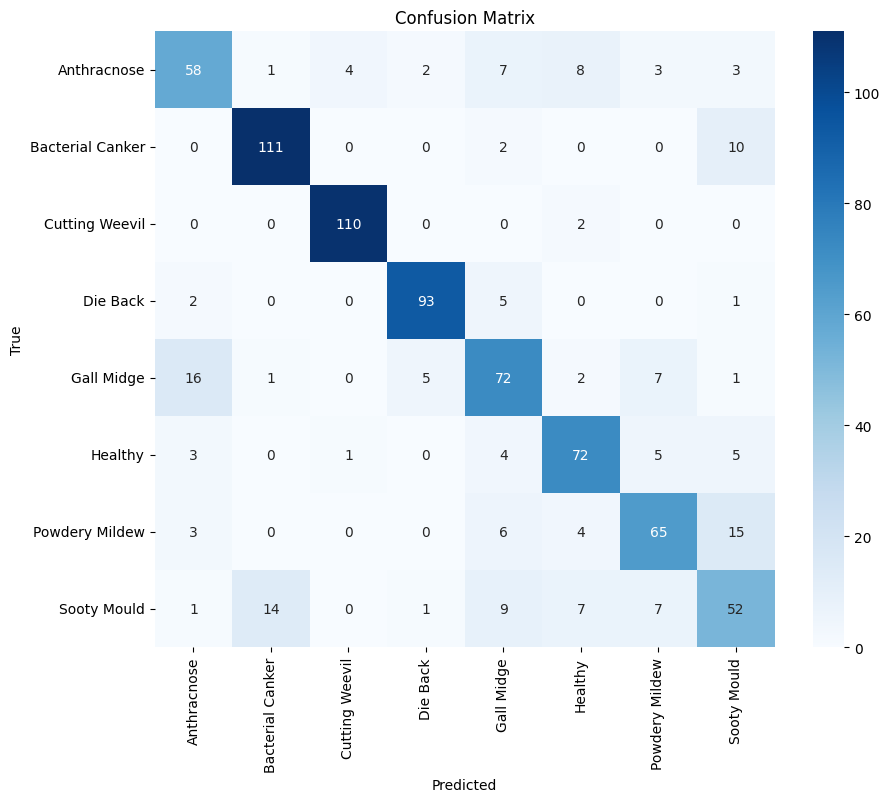

In [54]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()